In [59]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# importing dataframe
visits_df = pd.read_csv('../raw_data/Morocco_CCT_Education_School_Visits.csv', low_memory=False)

In [61]:
# printing few top rows
visits_df.head()

,stud_id,schoolunitid,schoolid,type_unit,groupid,benef,region,province,hhid_tayssir,stud_id_tayssir,...,gendercode,agecode,surveycode,year0,year1,year2,year3,year4,year5,year6
0,A00131005,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T012435,T01243501,...,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010
1,A00131007,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T016963,T01696302,...,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010
2,A00132009,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T000939,T00093903,...,2.0,7.0,183_SV,2008,2009,2009,2009,2009,2010,2010
3,A00131008,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,NaN,NaN,...,1.0,7.0,183_SV,2008,2009,2009,2009,2009,2010,2010
4,A00131001,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T032351,T03235102,...,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010


In [62]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71355 entries, 0 to 71354
Columns: 181 entries, stud_id to year6
dtypes: float64(116), int64(25), object(40)
memory usage: 98.5+ MB


In [63]:
visits_df.describe()

,groupid,gender,age_2010,prob_age,niv_annee2,v0_id_batch,v0_n_fiche,v0_i9,v0_i10,v0_i12_niveau,...,ruralcode,gendercode,agecode,year0,year1,year2,year3,year4,year5,year6
count,71355.000000,71355.000000,69511.000000,71355.000000,71354.000000,0.0,0.0,42119.000000,43275.000000,43686.000000,...,71355.0,71349.000000,69511.000000,71355.0,71355.0,71355.0,71355.0,71355.0,71355.0,71355.0
mean,1.873057,1.454208,10.692581,0.027622,3.558763,NaN,NaN,63.980650,1565.030942,2.764272,...,1.0,1.454330,10.692581,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
std,1.360360,0.498071,3.405805,0.163890,1.907942,NaN,NaN,43.478153,847.665718,1.384461,...,0.0,0.497913,3.405805,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,2.000000,0.000000,1.000000,NaN,NaN,0.000000,106.000000,0.000000,...,1.0,1.000000,2.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
25%,1.000000,1.000000,9.000000,0.000000,2.000000,NaN,NaN,23.000000,905.000000,2.000000,...,1.0,1.000000,9.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
50%,2.000000,1.000000,11.000000,0.000000,3.000000,NaN,NaN,56.000000,1505.000000,3.000000,...,1.0,1.000000,11.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
75%,3.000000,2.000000,13.000000,0.000000,5.000000,NaN,NaN,107.000000,2305.000000,4.000000,...,1.0,2.000000,13.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
max,4.000000,2.000000,101.000000,1.000000,8.000000,NaN,NaN,136.000000,3105.000000,5.000000,...,1.0,2.000000,101.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0


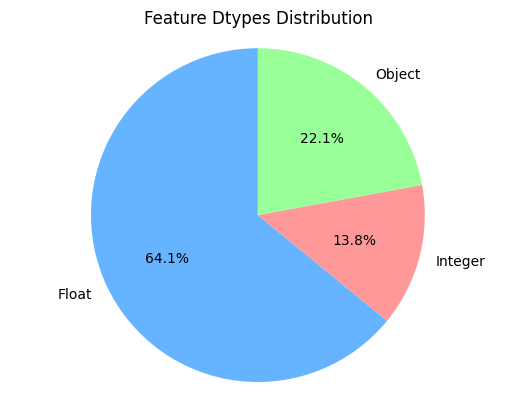

In [64]:
# getting an idea of dtypes and how many they are in the data

float_features = visits_df.select_dtypes(include=np.float64).shape[1]
int_features = visits_df.select_dtypes(include=np.int64).shape[1]
object_features = visits_df.select_dtypes(include=object).shape[1]


labels = ['Float', 'Integer', 'Object']
sizes = [float_features, int_features, object_features]
colors = ['#66b3ff', '#ff9999', '#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Feature Dtypes Distribution')
plt.show()

# Testing and sellecting necessary features

* v0_i12_niveau - Grade

* v0_i15 - Does the school unit have electricity ?

* v1_c13 - if dropped out date

* v0_a9 - Attendence

In [65]:
subset = visits_df[['stud_id', 'schoolunitid', 'v0_i12_niveau', 'v0_i15', 'v0_a9', 'gender', 'region', 'province']]
subset

,stud_id,schoolunitid,v0_i12_niveau,v0_i15,v0_a9,gender,region,province
0,A00131005,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,1,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...
71350,A63915011,A639,5.0,4.0,3.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,2.0,4.0,2.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,5.0,4.0,2.0,1,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,1.0,4.0,1.0,2,Marrakech - Tensift - Al Haouz,Essaouira


In [66]:
subset = subset.rename(columns={
    'v0_i12_niveau': 'Grade',
    'schoolunitid': 'Schoolunitid',
    'v0_i15': 'Does the school unit have electricity ?',
    'v1_c13': 'if dropped out date',  
    'v0_a9': 'Attendance',
    'gender': 'Gender',
    'region': 'Region',
    'province': 'Province' 
})

In [67]:
subset

,stud_id,Schoolunitid,Grade,Does the school unit have electricity ?,Attendance,Gender,Region,Province
0,A00131005,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,1,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...
71350,A63915011,A639,5.0,4.0,3.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,2.0,4.0,2.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,5.0,4.0,2.0,1,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,1.0,4.0,1.0,2,Marrakech - Tensift - Al Haouz,Essaouira


In [68]:
subset.isna().sum()

stud_id                                        0
Schoolunitid                                   0
Grade                                      27669
Does the school unit have electricity ?    27718
Attendance                                 27688
Gender                                         0
Region                                         0
Province                                       0
dtype: int64

In [69]:
# checking the number of unique values in dataset in Student_id
subset['stud_id'].nunique()

71355

In [70]:
# checking all values in each column
subset['Gender'].value_counts(dropna=False)

1    38933
2    32416
0        6
Name: Gender, dtype: int64

In [71]:
subset.drop(subset[subset['Gender'] == 0].index, inplace=True)

In [72]:
subset['Gender'].value_counts(dropna=False)

1    38933
2    32416
Name: Gender, dtype: int64

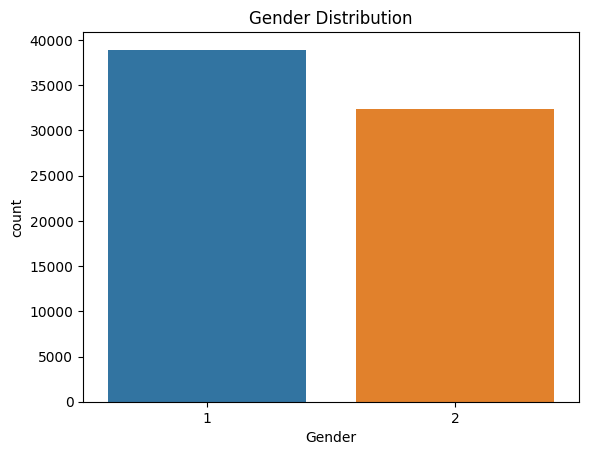

In [73]:
sns.countplot(x = subset['Gender'], data = subset)
plt.title('Gender Distribution')
plt.show()

In [74]:
subset['Grade'].value_counts(dropna=False)

NaN    27666
1.0    10557
2.0     9911
3.0     9086
4.0     7509
5.0     6616
0.0        4
Name: Grade, dtype: int64

In [75]:
subset

,stud_id,Schoolunitid,Grade,Does the school unit have electricity ?,Attendance,Gender,Region,Province
0,A00131005,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,1,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...
71350,A63915011,A639,5.0,4.0,3.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,2.0,4.0,2.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,5.0,4.0,2.0,1,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,1.0,4.0,1.0,2,Marrakech - Tensift - Al Haouz,Essaouira


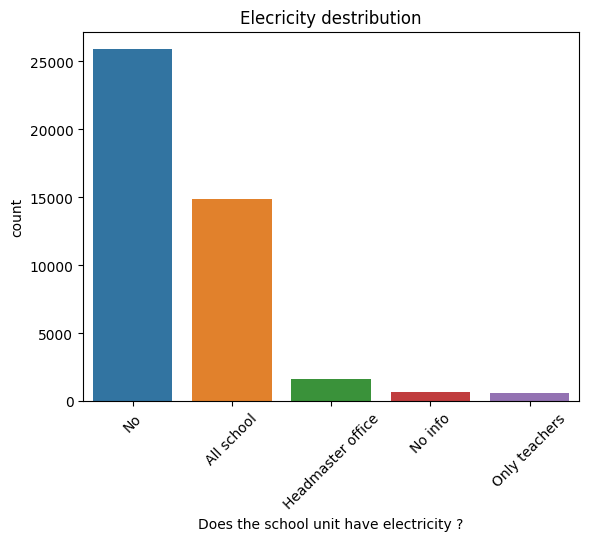

In [76]:
label_dict = {0: 'No info', 1: 'All school', 2: 'Headmaster office', 3: 'Only teachers', 4: 'No', 5: 'No info'}

electricity_category = subset['Does the school unit have electricity ?'].map(label_dict)


sns.countplot(x = electricity_category, order = electricity_category.value_counts().index)
plt.title('Elecricity destribution')
plt.xticks(rotation=45)
plt.show()


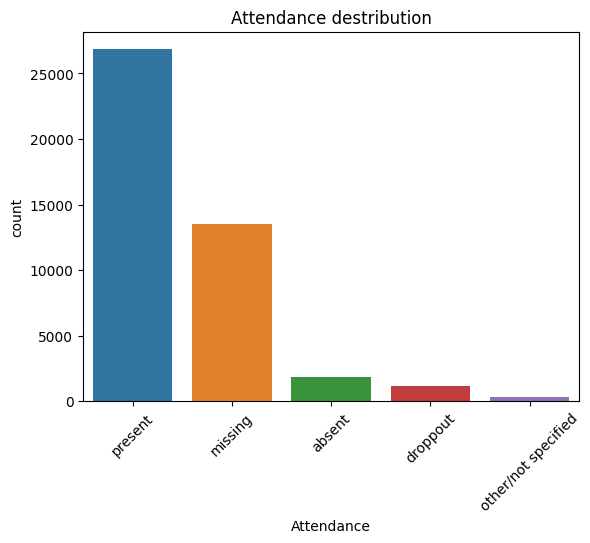

In [77]:
label_dict = {0: 'missing', 1: 'droppout', 2: 'present', 3: 'absent', 4: 'other/not specified'}

attendance_category = subset['Attendance'].map(label_dict)


sns.countplot(x = attendance_category, order = attendance_category.value_counts().index)
plt.title('Attendance destribution')
plt.xticks(rotation=45)
plt.show()

In [101]:
status = visits_df[['stud_id', 'schoolunitid', 'v1_c12', 'v2_c12', 'v3_c12', 'v4_c12', 'v5_c12', 'v6_c12', 'region', 'province']]
status

,stud_id,schoolunitid,v1_c12,v2_c12,v3_c12,v4_c12,v5_c12,v6_c12,region,province
0,A00131005,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,-99.0,-99.0,2.0,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...,...,...
71350,A63915011,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,NaN,2.0,2.0,4.0,NaN,NaN,Marrakech - Tensift - Al Haouz,Essaouira


In [102]:
status = status.rename(columns={
    'v1_c12': 'Visit 1',
    'v2_c12': 'Visit 2',
    'v3_c12': 'Visit 3',
    'v4_c12': 'Visit 4',  
    'v5_c12': 'Visit 5',
    'v6_c12': 'Visit 6'
})

In [103]:
visit_columns = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5', 'Visit 6']

In [104]:
missing_val = status[visit_columns].isna().sum()
missing_val

Visit 1    15931
Visit 2    16172
Visit 3    17127
Visit 4     1418
Visit 5    13413
Visit 6     9826
dtype: int64

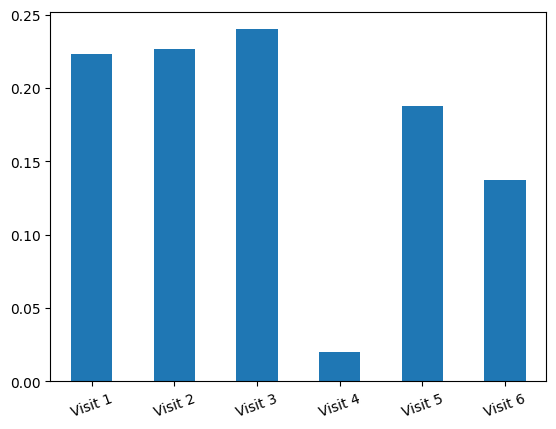

In [105]:
missing_ratio = missing_val / len(status)
missing_ratio.plot(kind='bar')
plt.xticks(rotation=20)
plt.show()


In [106]:
for visit in ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5', 'Visit 6']:
    print(f"{visit}:\n{status[visit].value_counts()}\n")

Visit 1:
 1.0     55065
 4.0       189
 2.0       139
 3.0        19
 5.0         8
-99.0        3
 6.0         1
Name: Visit 1, dtype: int64

Visit 2:
 1.0     39062
-99.0    14350
 2.0       764
 4.0       565
 5.0       348
 3.0        94
Name: Visit 2, dtype: int64

Visit 3:
 1.0     36638
-99.0    15902
 2.0       975
 4.0       493
 5.0       146
 3.0        48
 6.0        26
Name: Visit 3, dtype: int64

Visit 4:
 1.0     60246
 8.0      5516
 2.0      1639
 4.0      1166
 6.0      1001
 3.0       231
-99.0      138
Name: Visit 4, dtype: int64

Visit 5:
 1.0     51924
-99.0     4111
 2.0      1546
 4.0       273
 3.0        66
 8.0        18
 6.0         4
Name: Visit 5, dtype: int64

Visit 6:
 1.0     58542
 2.0      1945
-99.0      534
 4.0       346
 8.0       113
 3.0        49
Name: Visit 6, dtype: int64



In [107]:
dropped_then_enrolled = status[(status['Visit 1'] == 2) & (status['Visit 2'] == 1)]
print("Number of students who dropped out in Visit 1 but enrolled in Visit 2:", len(dropped_then_enrolled))

Number of students who dropped out in Visit 1 but enrolled in Visit 2: 29


In [108]:
# create new df for data manipulation

test_status = status.copy()
test_status.head()

,stud_id,schoolunitid,Visit 1,Visit 2,Visit 3,Visit 4,Visit 5,Visit 6,region,province
0,A00131005,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,-99.0,-99.0,2.0,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra


## Interpreting values

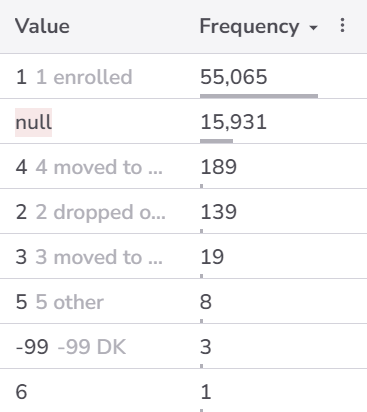

In [112]:
# Removing all null & -99 & 6 

test_status[visit_columns] = test_status[visit_columns].replace({6: pd.NA, -99: pd.NA})

In [113]:
test_status

,stud_id,schoolunitid,Visit 1,Visit 2,Visit 3,Visit 4,Visit 5,Visit 6,region,province
0,A00131005,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,<NA>,<NA>,2.0,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...,...,...
71350,A63915011,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,NaN,2.0,2.0,4.0,NaN,NaN,Marrakech - Tensift - Al Haouz,Essaouira


In [114]:
test_status.isna().sum()

stud_id             0
schoolunitid        0
Visit 1         15935
Visit 2         30522
Visit 3         33055
Visit 4          2557
Visit 5         17528
Visit 6         10360
region              0
province            0
dtype: int64

In [115]:
test_status = test_status.dropna(subset=visit_columns)
test_status

,stud_id,schoolunitid,Visit 1,Visit 2,Visit 3,Visit 4,Visit 5,Visit 6,region,province
12651,A00125001,A001,1.0,1.0,1.0,1.0,2.0,2.0,Meknhs - Tafilalet,Khenifra
12652,A00121005,A001,1.0,1.0,1.0,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
12653,A00121007,A001,1.0,1.0,1.0,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
12654,A00122001,A001,1.0,1.0,1.0,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
12656,A00121004,A001,1.0,1.0,1.0,1.0,1.0,1.0,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...,...,...
71349,A63914002,A639,1.0,1.0,1.0,1.0,4.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71350,A63915011,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,1.0,1.0,1.0,1.0,1.0,1.0,Marrakech - Tensift - Al Haouz,Essaouira


In [116]:
test_status.isna().sum()

stud_id         0
schoolunitid    0
Visit 1         0
Visit 2         0
Visit 3         0
Visit 4         0
Visit 5         0
Visit 6         0
region          0
province        0
dtype: int64

In [117]:
labels = {1: 'Enrolled', 2: 'Dropped Out', 3: 'Moved (same sector)', 4: 'Moved (other sector)', 5: 'Other'}

percentage_change = test_status[visit_columns].apply(lambda x: x.value_counts(normalize=True)).T
print(percentage_change)

              1.0       2.0       3.0       4.0       5.0       8.0
Visit 1  0.997086  0.002223       NaN  0.000593  0.000099       NaN
Visit 2  0.993777  0.003704  0.000049  0.000445  0.002025       NaN
Visit 3  0.994073  0.005235       NaN  0.000148  0.000543       NaN
Visit 4  0.981331  0.018669       NaN       NaN       NaN       NaN
Visit 5  0.969971  0.024349  0.001284  0.004396       NaN       NaN
Visit 6  0.966069  0.027313  0.001087  0.004346       NaN  0.001185


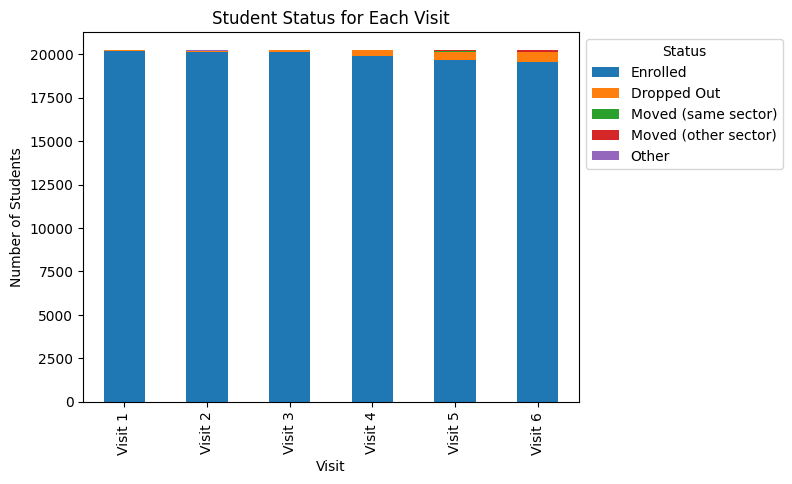

In [118]:
category_counts = test_status[visit_columns].apply(lambda x: x.value_counts())
category_counts.T.plot(kind='bar', stacked=True)
plt.xlabel('Visit')
plt.ylabel('Number of Students')
plt.title('Student Status for Each Visit')
plt.legend(labels.values(), loc='upper left', bbox_to_anchor=(1,1), title='Status')
plt.show()

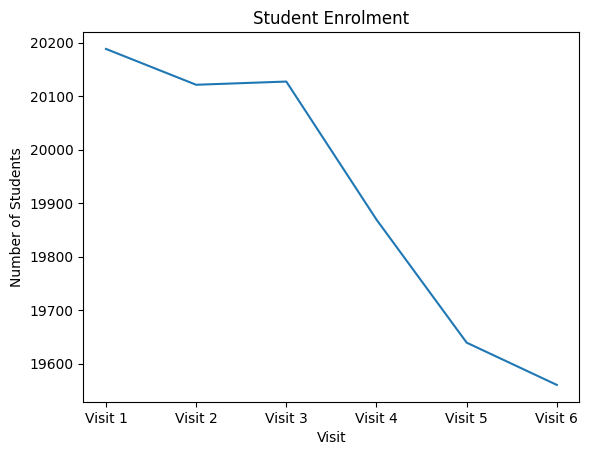

In [119]:
enrolled_counts = (test_status[visit_columns] == 1).sum()
plt.plot(enrolled_counts)
plt.xlabel('Visit')
plt.ylabel('Number of Students')
plt.title('Student Enrolment')
plt.show()

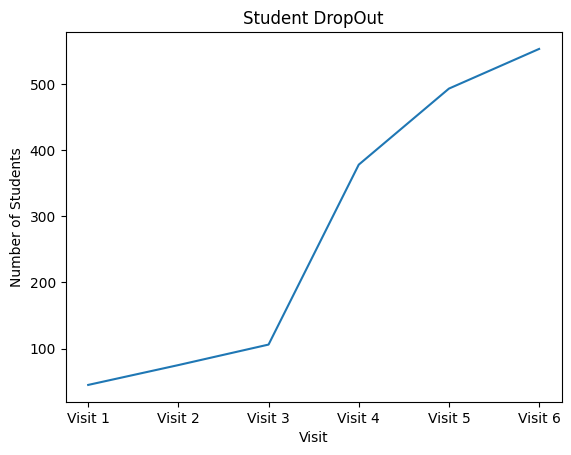

In [120]:
enrolled_counts = (test_status[visit_columns] == 2).sum()
plt.plot(enrolled_counts)
plt.xlabel('Visit')
plt.ylabel('Number of Students')
plt.title('Student DropOut')
plt.show()

In [121]:
enrolled_counts = (test_status[visit_columns] == 1).sum()
dropped_counts = (test_status[visit_columns] == 2).sum()

In [122]:
enrolled_counts

Visit 1    20188
Visit 2    20121
Visit 3    20127
Visit 4    19869
Visit 5    19639
Visit 6    19560
dtype: int64

In [123]:
dropped_counts

Visit 1     45
Visit 2     75
Visit 3    106
Visit 4    378
Visit 5    493
Visit 6    553
dtype: int64

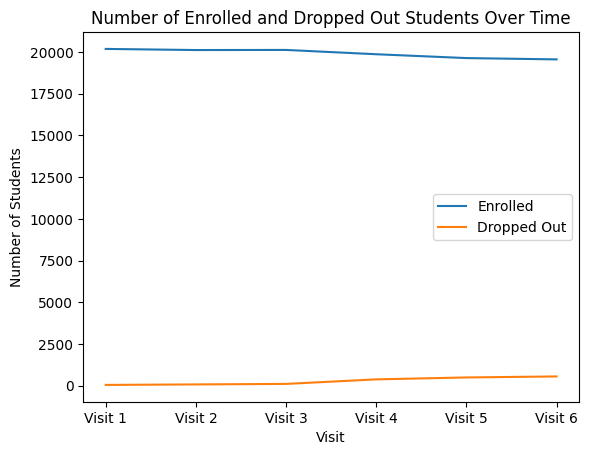

In [124]:
plt.plot(enrolled_counts, label='Enrolled')
plt.plot(dropped_counts, label='Dropped Out')
plt.xlabel('Visit')
plt.ylabel('Number of Students')
plt.title('Number of Enrolled and Dropped Out Students Over Time')
plt.legend()
plt.show()

In [100]:
test_status

,stud_id,schoolunitid,Visit 1,Visit 2,Visit 3,Visit 4,Visit 5,Visit 6
12651,A00125001,A001,1.0,1.0,1.0,1.0,2.0,2.0
12652,A00121005,A001,1.0,1.0,1.0,1.0,1.0,1.0
12653,A00121007,A001,1.0,1.0,1.0,1.0,1.0,1.0
12654,A00122001,A001,1.0,1.0,1.0,1.0,1.0,1.0
12656,A00121004,A001,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
71349,A63914002,A639,1.0,1.0,1.0,1.0,4.0,1.0
71350,A63915011,A639,1.0,1.0,1.0,1.0,1.0,1.0
71351,A63912002,A639,1.0,1.0,1.0,1.0,1.0,1.0
71352,A63915014,A639,1.0,1.0,1.0,1.0,1.0,1.0
